In [3]:
!pip install shap

In [1]:
# !pip install ipympl # install python packages
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from shap import TreeExplainer
from shap import summary_plot
from sklearn import metrics
from sklearn.model_selection import KFold

# display the plot
%matplotlib inline 

## Check Versions

In [3]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]


In [7]:
print(shap.__version__) # 0.46.0
print(sklearn.__version__) # 1.4.2
print(pd.__version__) # 2.2.2

0.46.0
1.4.2
2.2.2


In [9]:
# this sets up the Matplotlib interactive windows:
!pip install ipympl
%matplotlib widget

# this changes the default date converter for better interactive plotting of dates:
plt.rcParams['date.converter'] = 'concise'


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [11]:
os.getcwd()

'/Users/keyongdeng/Library/CloudStorage/OneDrive-Personal/PhD/Projects/P2-Cluster/PP-104-2024-Manuscripts/NEO_PP104_KD_Syntax_Check/Data/Code/06_SHAP_Plot_code'

## Fasting status

In [13]:
fasting = pd.read_table("metadata_metab_fasting.SHAP.txt")
fasting.head()

X = fasting.loc[:, "MVLDLTG_1":"Alb_1"]

# y = fasting.iloc[:, 0]

In [15]:
display(fasting.head())
fasting['clusters.fasting'].value_counts()

,clusters.fasting,MVLDLTG_1,IDLP_1,SHDLFC_1,UnSat_1,DHA_1,Glc_1,Lac_1,Cit_1,Gln_1,His_1,Phe_1,Tyr_1,Ace_1,bOHBut_1,Crea_1,Alb_1
0,3,0.2431,1.328000e-07,0.1051,1.327,0.19120,3.422,2.871,0.1623,0.4506,0.03879,0.04955,0.03990,0.03191,0.08542,0.06381,0.08350
1,1,0.7122,1.295000e-07,0.1149,1.179,0.11620,4.285,1.341,0.1249,0.4802,0.06020,0.05302,0.04550,0.06458,0.12170,0.07352,0.08854
2,1,0.2158,1.397000e-07,0.1108,1.227,0.18090,4.860,1.122,0.1456,0.4402,0.06398,0.06130,0.07260,0.07100,0.09441,0.05079,0.08560
3,4,0.3321,5.191000e-08,0.1116,1.287,0.06842,4.294,1.589,0.1533,0.4596,0.06088,0.07111,0.07814,0.04043,0.11160,0.07273,0.08039
4,3,0.2251,1.115000e-07,0.1071,1.272,0.10810,4.374,1.248,0.1544,0.4983,0.05001,0.04553,0.06020,0.03996,0.08622,0.04905,0.08602


clusters.fasting
1    1491
3    1393
4    1288
2    1148
Name: count, dtype: int64

In [17]:
# Recoding the clusters.fasting column
# Function to map old values to new values

def map_cluster_fasting(value):
    if value == 1:
        return 4
    elif value == 2:
        return 2
    elif value == 3:
        return 1
    elif value == 4:
        return 3
    else:
        return None
    
# Apply the mapping function to the 'cluster_fasting' column
fasting['clusters.fasting'] = fasting['clusters.fasting'].apply(map_cluster_fasting)

print(fasting['clusters.fasting'].value_counts())

# select the first column
y =  fasting.iloc[:, 0]

clusters.fasting
4    1491
1    1393
3    1288
2    1148
Name: count, dtype: int64


- 1, 2, 3, 4 indicates the risk level from low to high (low, low-intermediate, high-intermediate, high)

Revised: without generating train and testing dataset

In [51]:
# generate the train and test datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # recode the y to 0 and 1
# y_train = y_train
# y_test = y_test

In [21]:
# y_test.value_counts()
y.value_counts()

clusters.fasting
4    1491
1    1393
3    1288
2    1148
Name: count, dtype: int64

In [23]:
# use the randomforestclassifier function
np.random.seed(2024)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y.values.ravel())

# apply shap explainer
explainer = shap.TreeExplainer(rf_classifier)

# apply the explainer on the text dataset
# the test dataset has 1064 obs (20% of the 5320 obs)
shap_values = explainer.shap_values(X)

In [25]:
# see the data structure of shap value
print(shap_values.shape)

(5320, 16, 4)


In [27]:
explainer.expected_value[1]

0.21565225563909782

In [29]:
explainer.expected_value[2]

0.24115789473684227

In [31]:
shap_values[1][0, :]

array([-0.11318464, -0.12641681, -0.04979714,  0.28939859])

In [33]:
explainer.expected_value.shape

(4,)

In [35]:
# assign to shap_value array
shap_values = np.array(explainer.shap_values(X))

In [37]:
print(shap_values.shape) # need to change the structure of shap_values array

(5320, 16, 4)


In [39]:
# transposed shap_value array
shap_values_transposed = shap_values.transpose(2, 0, 1)
print(shap_values_transposed.shape)

(4, 5320, 16)


In [41]:
shap_values_transposed[0][0, :]
explainer.expected_value[0]

0.2622067669172933

In [43]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], # Reference value that the feature contributions start from. 
                shap_values_transposed[1][0, :], # Matrix of SHAP values (# features) or (# samples x # features).
                X.iloc[0, :]) # Matrix of feature values (# features) or (# samples x # features).

In [45]:
shap_values_transposed[1].shape
X.shape

(5320, 16)

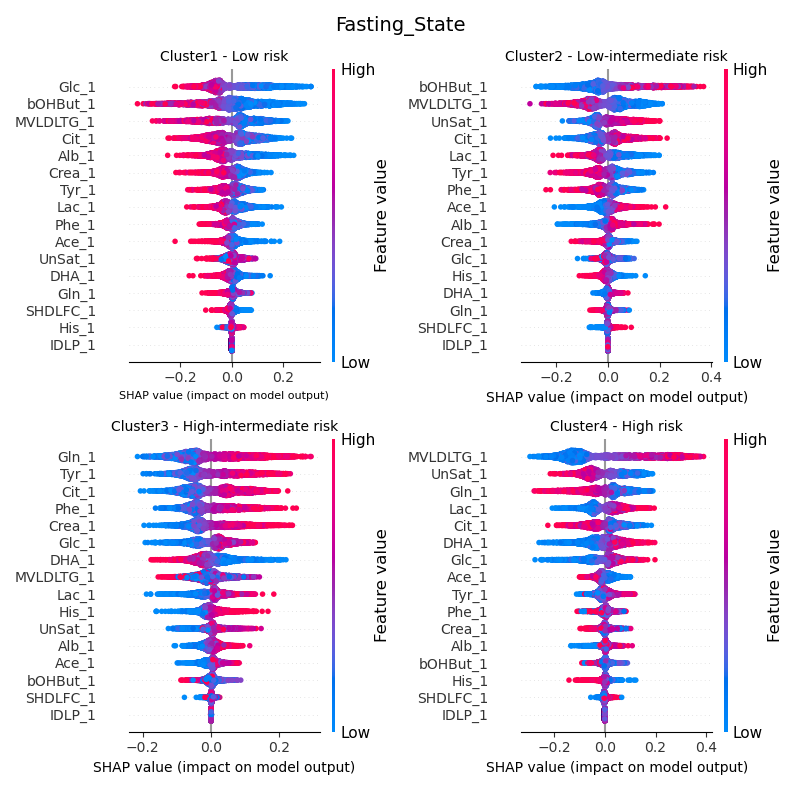

In [49]:
# Create a summary plot
# clear the current figure
plt.clf() 
fig, ax = plt.subplots(2, 2)

# set the fontsize of axis
axis_label_fontsize = 10

# Plot the first SHAP summary plot
plt.sca(ax[0,0])  # Set the current axis to the first subplot
shap.summary_plot(shap_values_transposed[0], X, show = False)
ax[0,0].set_title("Cluster1 - Low risk", fontsize = 10)  # Add subtitle
ax[0,0].tick_params(axis='x', labelsize = axis_label_fontsize)
ax[0,0].tick_params(axis='y', labelsize =  axis_label_fontsize)

# change x-axis title size
ax[0,0].set_xlabel(ax[0,0].get_xlabel(), fontsize=8)

# change legend size
legend = ax[0,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the second SHAP summary plot
plt.sca(ax[0,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[1], X, show = False)
ax[0,1].set_title("Cluster2 - Low-intermediate risk", fontsize = 10)  # Add subtitle
ax[0,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[0,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[0,1].set_xlabel(ax[0,0].get_xlabel(), fontsize=10)
legend = ax[0,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})


# Plot the third SHAP summary plot
plt.sca(ax[1,0])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[2], X, show = False)
ax[1,0].set_title("Cluster3 - High-intermediate risk", fontsize = 10)  # Add subtitle
ax[1,0].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,0].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,0].set_xlabel(ax[0,0].get_xlabel(), fontsize = 10)
legend = ax[1,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# Plot the third SHAP summary plot
plt.sca(ax[1,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[3], X, show = False)
ax[1,1].set_title("Cluster4 - High risk", fontsize = 10)  # Add subtitle
ax[1,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,1].set_xlabel(ax[0,0].get_xlabel(), fontsize = 10)
legend = ax[1,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# add the whole title
fig.suptitle('Fasting_State', fontsize = 14)

# start from left, bottom, right, top
plt.tight_layout(rect = [0, 0, 1, 1])  # Adjust layout to prevent overlap

plt.show()  # Display the figure

fig.savefig('fasting_shap_v5.png')   # save the figure to file

In [51]:
shap_values_transposed[3]

array([[-1.32078199e-01,  3.24619715e-06, -6.19392953e-03, ...,
        -4.08873739e-03, -1.92024410e-03, -1.25331166e-02],
       [ 2.89398591e-01,  1.57859657e-06,  5.58083849e-03, ...,
         1.62731367e-02,  4.75778231e-03,  1.38910790e-02],
       [-1.66123619e-01,  5.95415887e-06,  2.95122474e-03, ...,
         3.97750540e-02,  1.91113678e-02,  1.87265113e-02],
       ...,
       [-1.59068591e-01, -1.56937320e-06,  2.84543500e-03, ...,
        -1.18632733e-02,  6.70684118e-03, -1.50844032e-02],
       [ 3.17433785e-01,  3.60783259e-06, -3.32068198e-03, ...,
         1.03903517e-02,  1.49621754e-02,  6.13429590e-03],
       [ 1.59530676e-01, -4.85826048e-06, -1.26924675e-02, ...,
        -1.53310868e-03,  1.89611658e-02, -1.25011759e-02]])

## Postprandial Status

In [53]:
post = pd.read_table("metadata_metab_post.SHAP.txt")
# display(post.head())
 
X_post = post.loc[:, "MVLDLP_3":"Alb_3"]
y_post = post.iloc[:, 0]

y_post = y_post - 1
y_post.value_counts()
# X_train, X_test, y_train, y_test = train_test_split(X_post, y_post, test_size=0.2, random_state=42)
# y_train = y_train - 1
# y_test = y_test - 1

C4
3    1399
1    1385
0    1311
2    1225
Name: count, dtype: int64

In [55]:
X_post.shape

(5320, 16)

In [57]:
# the same step as fasting
np.random.seed(2024)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_post, y_post)

explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_post)

shap_values_transposed_post = shap_values.transpose(2, 0, 1)
print(shap_values_transposed_post.shape)

(4, 5320, 16)


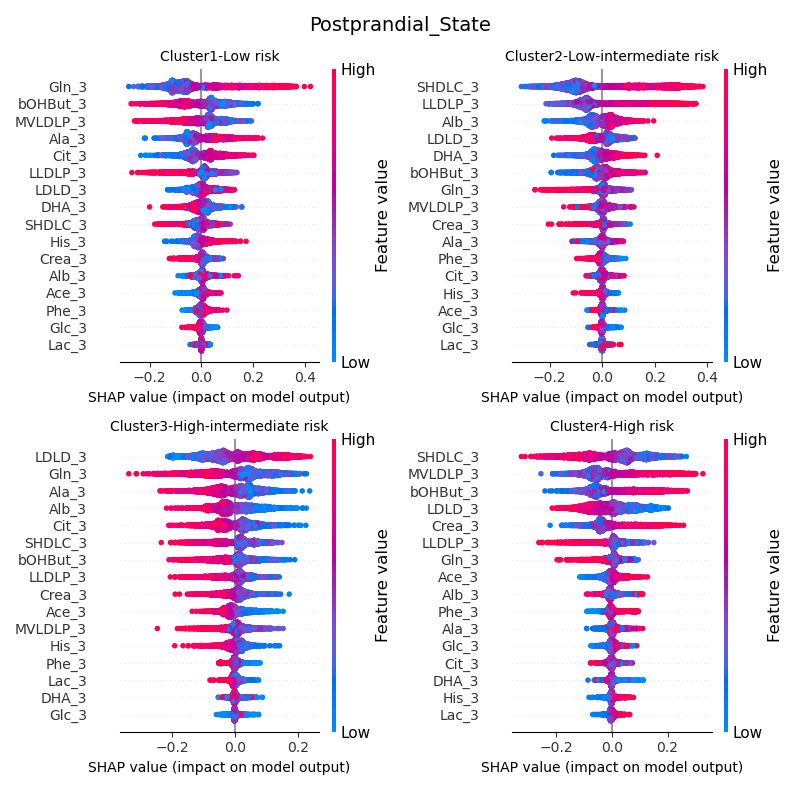

In [61]:
# Create a summary plot
# Clear the current figure
plt.clf() 
fig, ax = plt.subplots(2, 2)

# set the fontsize of axis
axis_label_fontsize = 10

# Plot the first SHAP summary plot
plt.sca(ax[0,0])  # Set the current axis to the first subplot
shap.summary_plot(shap_values_transposed_post[0], X_post, show = False)
ax[0,0].set_title("Cluster1-Low risk", fontsize = 10)  # Add subtitle
ax[0,0].tick_params(axis='x', labelsize = axis_label_fontsize)
ax[0,0].tick_params(axis='y', labelsize =  axis_label_fontsize)
# change x-axis title size
ax[0,0].set_xlabel(ax[0,0].get_xlabel(), fontsize=10)
# change legend size
legend = ax[0,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the second SHAP summary plot
plt.sca(ax[0,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[1], X_post, show = False)
ax[0,1].set_title("Cluster2-Low-intermediate risk", fontsize = 10)  # Add subtitle
ax[0,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[0,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[0,1].set_xlabel(ax[0,0].get_xlabel(), fontsize=10)
legend = ax[0,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})


# Plot the third SHAP summary plot
plt.sca(ax[1,0])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[2], X_post, show = False)
ax[1,0].set_title("Cluster3-High-intermediate risk", fontsize = 10)  # Add subtitle
ax[1,0].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,0].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,0].set_xlabel(ax[0,0].get_xlabel(), fontsize = 10)
legend = ax[1,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# Plot the third SHAP summary plot
plt.sca(ax[1,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[3], X_post, show = False)
ax[1,1].set_title("Cluster4-High risk", fontsize = 10)  # Add subtitle
ax[1,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,1].set_xlabel(ax[0,0].get_xlabel(), fontsize = 10)
legend = ax[1,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# add the whole title
fig.suptitle('Postprandial_State', fontsize = 14)

plt.tight_layout(rect = [0, 0, 1, 1])  # Adjust layout to prevent overlap
plt.show()  # Display the figure

fig.savefig('post_shap_v4.png')   # save the figure to file

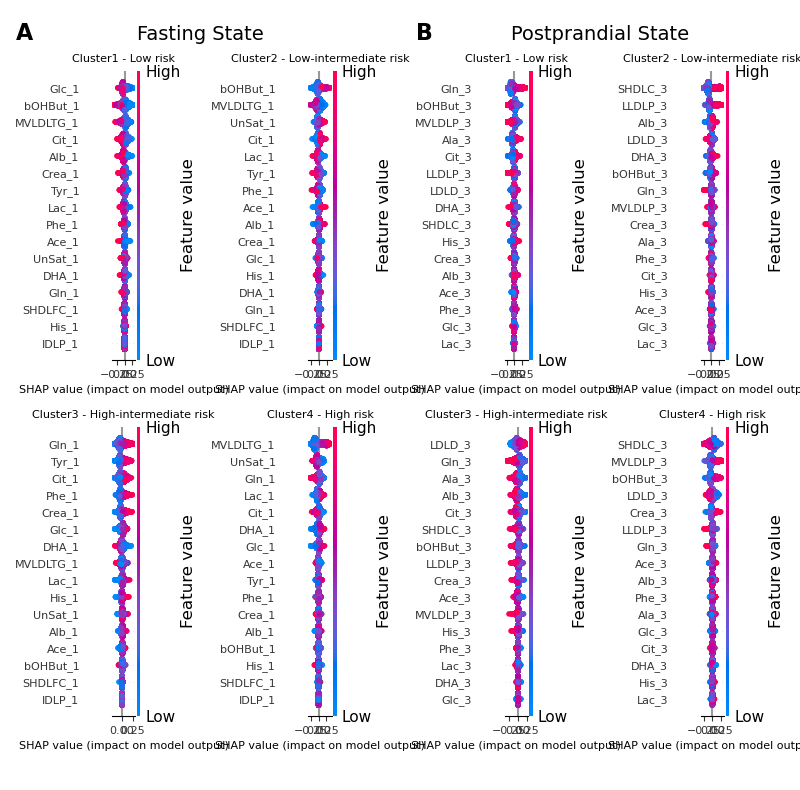

In [63]:
fig, ax = plt.subplots(2, 4, figsize=(60, 10))

# Add "A" label for first group of plots
fig.text(0.02, 0.95, 'A', fontsize=16, fontweight='bold')

# Add "B" label for second group of plots
fig.text(0.52, 0.95, 'B', fontsize=16, fontweight='bold')

# Add separate titles for each group
# Title for first group (left side)
fig.text(0.25, 0.95, 'Fasting State', fontsize=14, ha='center')

# Title for second group (right side)
fig.text(0.75, 0.95, 'Postprandial State', fontsize=14, ha='center')

# set the fontsize of axis
axis_label_fontsize = 8

# Plot the first SHAP summary plot
plt.sca(ax[0,0])  # Set the current axis to the first subplot
shap.summary_plot(shap_values_transposed[0], X, show = False)
ax[0,0].set_title("Cluster1 - Low risk", fontsize = 8)  # Add subtitle
ax[0,0].tick_params(axis='x', labelsize = axis_label_fontsize)
ax[0,0].tick_params(axis='y', labelsize =  axis_label_fontsize)

# change x-axis title size
ax[0,0].set_xlabel(ax[0,0].get_xlabel(), fontsize=8)

# change legend size
legend = ax[0,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the second SHAP summary plot
plt.sca(ax[0,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[1], X, show = False)
ax[0,1].set_title("Cluster2 - Low-intermediate risk", fontsize = 8)  # Add subtitle
ax[0,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[0,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[0,1].set_xlabel(ax[0,0].get_xlabel(), fontsize=8)
legend = ax[0,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})


# Plot the third SHAP summary plot
plt.sca(ax[1,0])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[2], X, show = False)
ax[1,0].set_title("Cluster3 - High-intermediate risk", fontsize = 8)  # Add subtitle
ax[1,0].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,0].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,0].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# Plot the third SHAP summary plot
plt.sca(ax[1,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[3], X, show = False)
ax[1,1].set_title("Cluster4 - High risk", fontsize = 8)  # Add subtitle
ax[1,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,1].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# add the whole title
# fig.suptitle('Fasting_State', fontsize = 14)

###### Plot the first SHAP summary plot for postprandial status #########
plt.sca(ax[0,2])  # Set the current axis to the first subplot
shap.summary_plot(shap_values_transposed_post[0], X_post, show = False)
ax[0,2].set_title("Cluster1 - Low risk", fontsize = 8)  # Add subtitle
ax[0,2].tick_params(axis='x', labelsize = axis_label_fontsize)
ax[0,2].tick_params(axis='y', labelsize =  axis_label_fontsize)
# change x-axis title size
ax[0,2].set_xlabel(ax[0,0].get_xlabel(), fontsize=8)
# change legend size
legend = ax[0,2].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the second SHAP summary plot
plt.sca(ax[0,3])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[1], X_post, show = False)
ax[0,3].set_title("Cluster2 - Low-intermediate risk", fontsize = 8)  # Add subtitle
ax[0,3].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[0,3].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[0,3].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[0,3].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})


# Plot the third SHAP summary plot
plt.sca(ax[1,2])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[2], X_post, show = False)
ax[1,2].set_title("Cluster3 - High-intermediate risk", fontsize = 8)  # Add subtitle
ax[1,2].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,2].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,2].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,2].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# Plot the third SHAP summary plot
plt.sca(ax[1,3])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[3], X_post, show = False)
ax[1,3].set_title("Cluster4 - High risk", fontsize = 8)  # Add subtitle
ax[1,3].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,3].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,3].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,3].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# add the whole title
# fig.suptitle('Postprandial_State', fontsize = 14)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the figure with high resolution
fig.savefig('combined_analysis_v3.png',  # filename
            dpi=500,                  # resolution (dots per inch)
            # bbox_inches='tight',      # trim whitespace around the figure
            format='png',             # specify format
            transparent=False,        # white background
            facecolor='white',        # ensure white background
            edgecolor='none',         # no edge color
            pad_inches=0.1)           # small padding around the figure

/Users/keyongdeng/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:950: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.tight_layout()
/Users/keyongdeng/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:950: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.tight_layout()
/Users/keyongdeng/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:950: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.tight_layout()
/Users/keyongdeng/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:950: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.tight_layout()
/Users/keyongdeng/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:950: UserWarning: This figure includes Axes

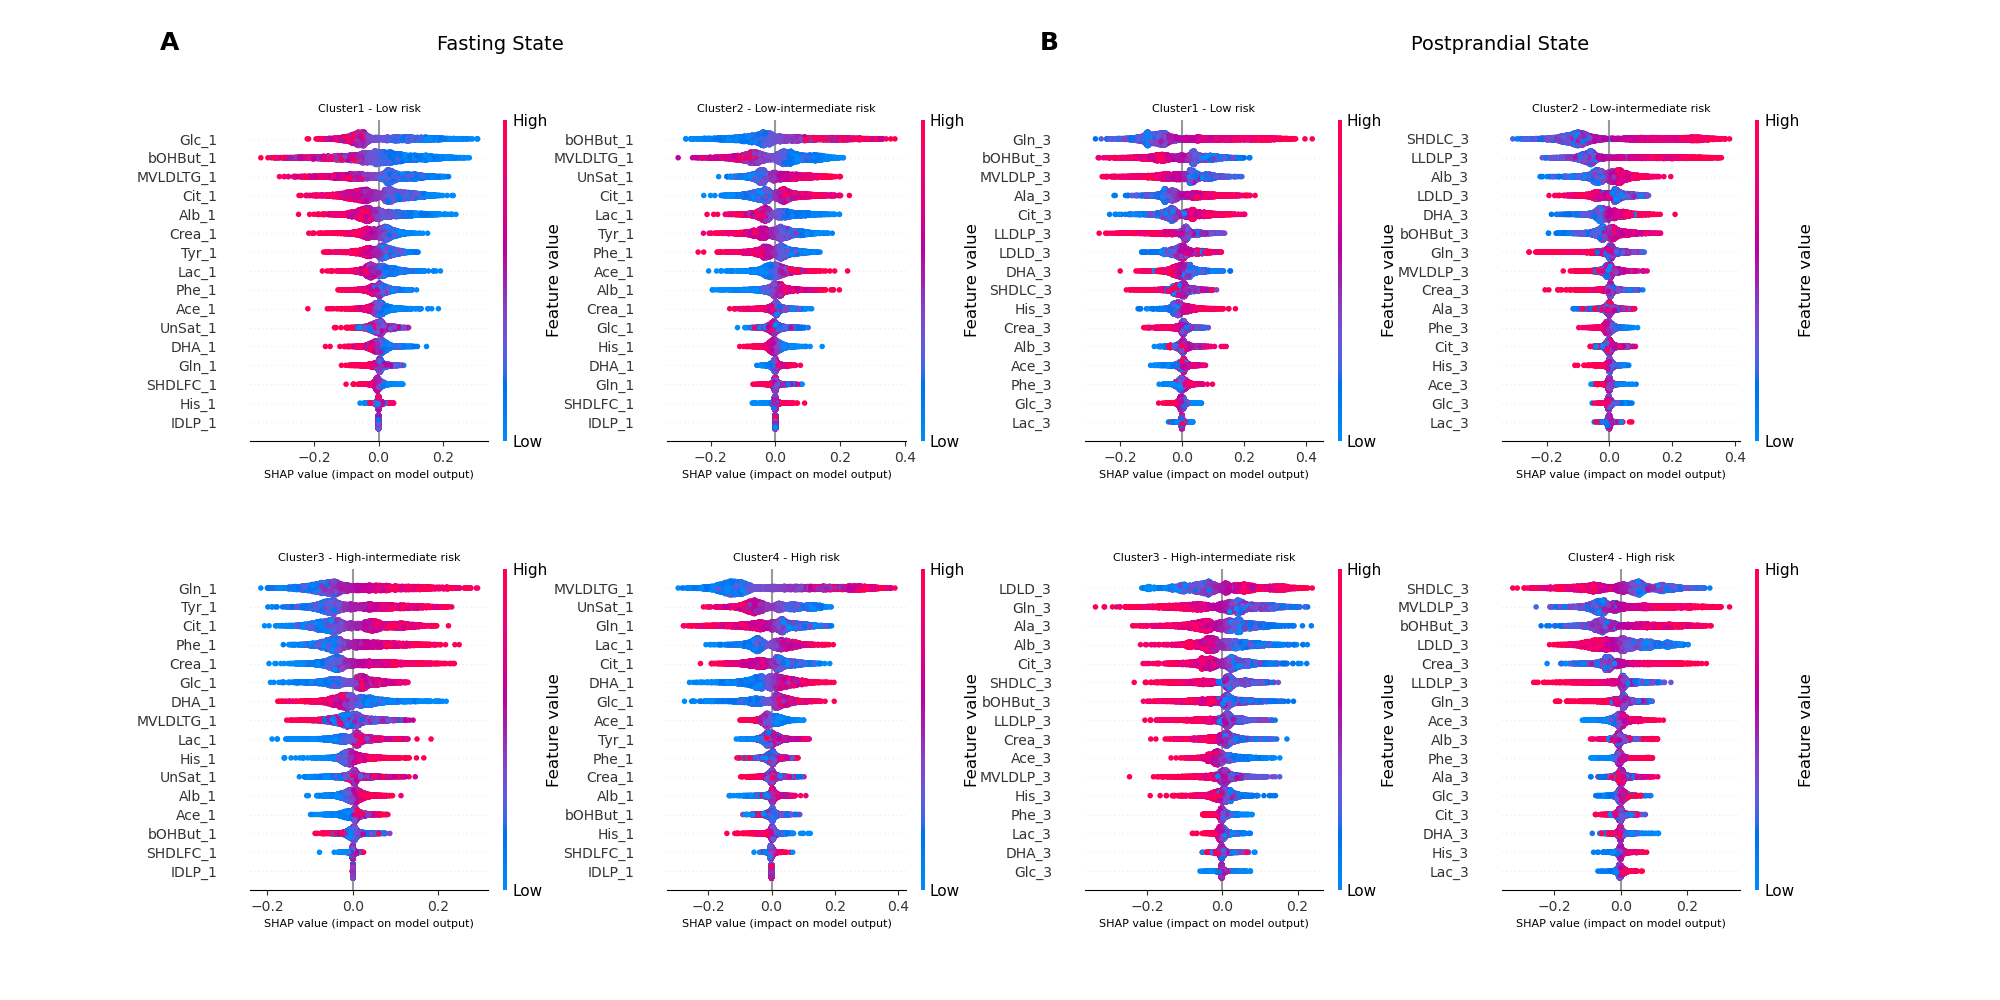

In [65]:
# Create figure with explicit size control
plt.clf() 
fig = plt.figure(figsize=(20, 10))  # Create figure first

# Create GridSpec with better control
gs = fig.add_gridspec(2, 4, 
                      height_ratios=[1, 1],
                      width_ratios=[1, 1, 1, 1],
                      hspace=0.4,  # Increased spacing
                      wspace=0.4)

ax = np.empty((2, 4), dtype=object)  # Create empty array for axes

# Create each subplot using the gridspec
for i in range(2):
    for j in range(4):
        ax[i,j] = fig.add_subplot(gs[i,j])

# Add "A" label for first group of plots
fig.text(0.08, 0.95, 'A', fontsize=18, fontweight='bold')

# Add "B" label for second group of plots
fig.text(0.52, 0.95, 'B', fontsize=18, fontweight='bold')

# Add separate titles for each group
fig.text(0.25, 0.95, 'Fasting State', fontsize=14, ha='center')
fig.text(0.75, 0.95, 'Postprandial State', fontsize=14, ha='center')

# set the fontsize of axis
axis_label_fontsize = 10

# Plot the first SHAP summary plot
plt.sca(ax[0,0])  # Set the current axis to the first subplot
shap.summary_plot(shap_values_transposed[0], X, show = False)
ax[0,0].set_title("Cluster1 - Low risk", fontsize = 8)  # Add subtitle
ax[0,0].tick_params(axis='x', labelsize = axis_label_fontsize)
ax[0,0].tick_params(axis='y', labelsize =  axis_label_fontsize)

# change x-axis title size
ax[0,0].set_xlabel(ax[0,0].get_xlabel(), fontsize=8)

# change legend size
legend = ax[0,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the second SHAP summary plot
plt.sca(ax[0,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[1], X, show = False)
ax[0,1].set_title("Cluster2 - Low-intermediate risk", fontsize = 8)  # Add subtitle
ax[0,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[0,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[0,1].set_xlabel(ax[0,0].get_xlabel(), fontsize=8)
legend = ax[0,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the third SHAP summary plot
plt.sca(ax[1,0])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[2], X, show = False)
ax[1,0].set_title("Cluster3 - High-intermediate risk", fontsize = 8)  # Add subtitle
ax[1,0].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,0].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,0].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,0].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# Plot the fourth SHAP summary plot
plt.sca(ax[1,1])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed[3], X, show = False)
ax[1,1].set_title("Cluster4 - High risk", fontsize = 8)  # Add subtitle
ax[1,1].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,1].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,1].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,1].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

###### Plot the first SHAP summary plot for postprandial status #########
plt.sca(ax[0,2])  # Set the current axis to the first subplot
shap.summary_plot(shap_values_transposed_post[0], X_post, show = False)
ax[0,2].set_title("Cluster1 - Low risk", fontsize = 8)  # Add subtitle
ax[0,2].tick_params(axis='x', labelsize = axis_label_fontsize)
ax[0,2].tick_params(axis='y', labelsize =  axis_label_fontsize)
# change x-axis title size
ax[0,2].set_xlabel(ax[0,0].get_xlabel(), fontsize=8)
# change legend size
legend = ax[0,2].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the second SHAP summary plot
plt.sca(ax[0,3])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[1], X_post, show = False)
ax[0,3].set_title("Cluster2 - Low-intermediate risk", fontsize = 8)  # Add subtitle
ax[0,3].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[0,3].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[0,3].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[0,3].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop={'size': 8})

# Plot the third SHAP summary plot
plt.sca(ax[1,2])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[2], X_post, show = False)
ax[1,2].set_title("Cluster3 - High-intermediate risk", fontsize = 8)  # Add subtitle
ax[1,2].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,2].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,2].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,2].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

# Plot the fourth SHAP summary plot
plt.sca(ax[1,3])  # Set the current axis to the second subplot
shap.summary_plot(shap_values_transposed_post[3], X_post, show = False)
ax[1,3].set_title("Cluster4 - High risk", fontsize = 8)  # Add subtitle
ax[1,3].tick_params(axis = 'x', labelsize = axis_label_fontsize)
ax[1,3].tick_params(axis = 'y', labelsize = axis_label_fontsize)
ax[1,3].set_xlabel(ax[0,0].get_xlabel(), fontsize = 8)
legend = ax[1,3].get_legend()
if legend:
    legend.set_title(legend.get_title().get_text(), prop = {'size': 8})

fig.set_size_inches(20, 10, forward=True)  # Explicitly set size again
plt.draw()  # Force draw to apply size

fig.savefig('combined_analysis_v4.png',
            dpi=500,
            bbox_inches=None,  # Don't auto-adjust bounds
            format='png',
            transparent=False,
            facecolor='white',
            edgecolor='none',
            pad_inches=0.1)